# Global Power Plant Database

# Problem Statement:


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


# Key attributes of the database

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import os

#Data Visulaziation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Checking top 5 rows
pd.set_option('display.max_columns',None) #to show all columns
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
#checking the dataset
df.shape

(907, 27)

The dataset contains 907 Rows and 27 Columns.

# Exploratory Data Analysis(EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We need to convert all object datatype into numeric datatype by the help of encoding techniques.

In [7]:
#checking Null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Our dataset contains very high number of Null Values.

In [8]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id,generation_gwh_2013,generation_gwh_2019 & estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

So let's do some feature engineering here.

# Feature Selection

In [9]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [10]:
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

We see that only 'IND' & 'India' is listed in the 'country' & 'country_long' repectively, hence there is no impact of these two features on prediction. So we can drop this columns.

In [11]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [12]:
df["other_fuel1"].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

other_fuel1 column conatins 3 unique values i.e. Oil,Gas & Cogeneration.

In [13]:
# Dropping irrelevant columns, which contains only one unique value or NaN.
df.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","year_of_capacity_data","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)


In [14]:
#Dropping the columns that has no impact on the prediction
df.drop("name",axis=1,inplace=True) 
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)

With this columns we have also drop "owner" and "url" columns, because it will also not effect our dataset.

In [15]:
#Now, again checking shape of our dataset
df.shape

(907, 15)

We have droped 12 columns.

In [16]:
# Checking null values again after shorting the dataset.
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

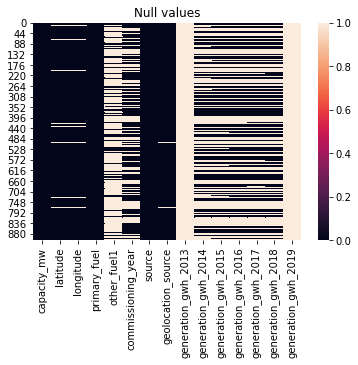

In [17]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

We can clearly observe the white lines in the heat map which indicates the missing values in the dataset. Whereas "" We can clearly observe the white lines in the heat map which indicates the missing values in the dataset. Whereas "" We can clearly observe the white lines in the heat map which indicates the missing values in the dataset. Whereas "generation_gwh_2013" & "generation_gwh_2013" is completely null.

In [18]:
#Checking the skewness of the dataset
df.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
generation_gwh_2013         NaN
generation_gwh_2019         NaN
dtype: float64

In [19]:
#let's drop this 2 columns, because it contains only NaN
df.drop("generation_gwh_2013",axis=1,inplace=True)
df.drop("generation_gwh_2019",axis=1,inplace=True)

In [20]:
df.shape

(907, 13)

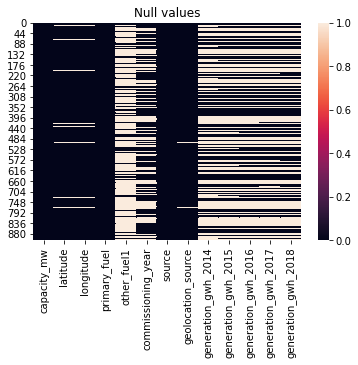

In [21]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [22]:
df.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

# Now filling Null Values using imputaion techniques

In [23]:
#checking the mean of latitude
df['latitude'].mean()

21.19791811846691

In [24]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [25]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

# Filling the null values

In [26]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())


In [27]:
#again checking the the null values after filling all the null values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

No null values is present in our dataset now.

<AxesSubplot:>

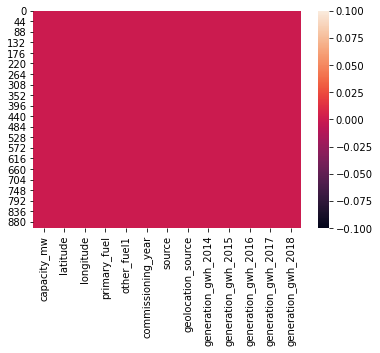

In [28]:
sns.heatmap(df.isnull())

In [29]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2019
df["Power_plant_age"] = 2019 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

Here I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [30]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,817.977250,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,663.774500,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,4.0


# Statistical Description

In [31]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1657.121797,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3046.862910,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,817.977250,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,817.977250,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,817.977250,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35116.000000,92.000000


The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [32]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [33]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Data Visualization

# Categorical column visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


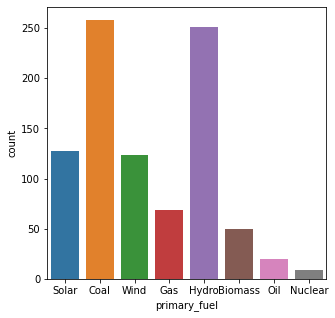

In [34]:
print(df['primary_fuel'].value_counts())   #visualizing the fuel types in Fuel_Type
plt.figure(figsize=(5,5))
sns.countplot(df['primary_fuel'])
plt.show()

Here we can see that the 'Coal' is mainly used as the primary_fuel in most of the powerplants then 'Hydro' followed by 'solar','wind','gas','biomass','oil' & 'Nuclear'.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


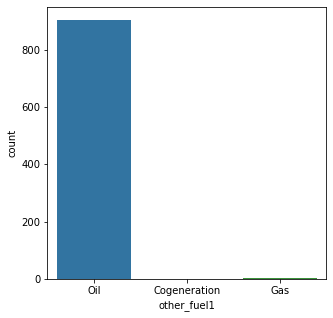

In [35]:
#checking the count of other_fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

It is clearly seen that 'oil' is mainly used as "other_fuel1" followed by 'gas' & 'cogeneration'.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


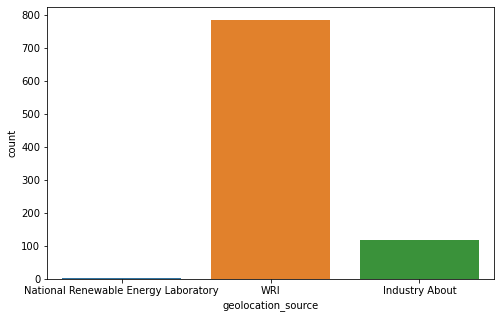

In [36]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

 Maximum geolocation information is shared by this WRI source.

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64


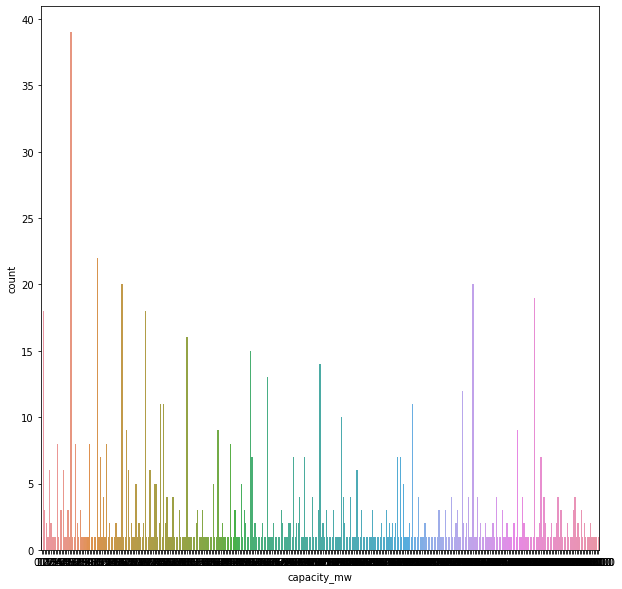

In [37]:
#visualizing the capacity_mw
print(df['capacity_mw'].value_counts())   
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

# Checking the Distribution of the Dataset

# Numerical Column

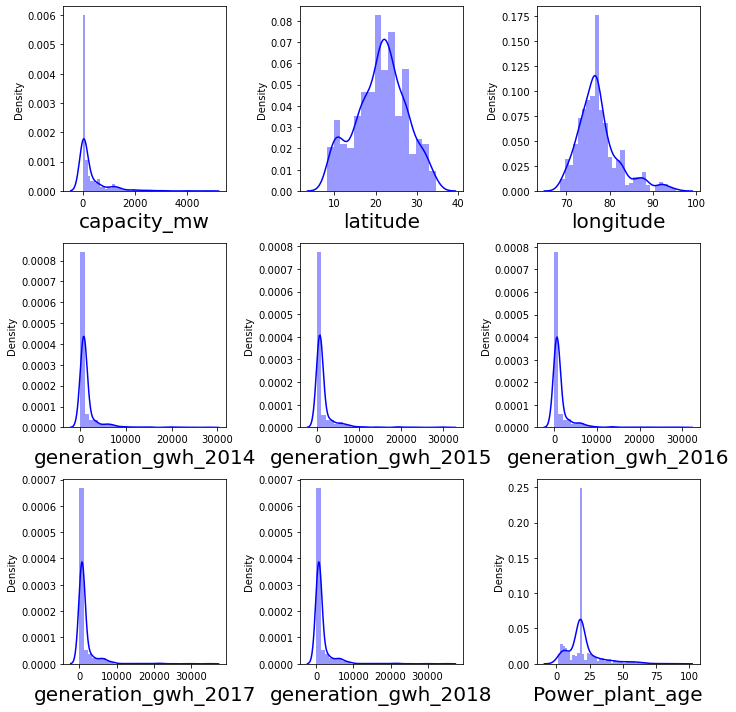

In [38]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here we can see that the data is not normally distributed.Outliers and skewness is present, which needs to be treated.

# Bivariate Analysis

# Corealtion between target 'Capacity_mw' with other features

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

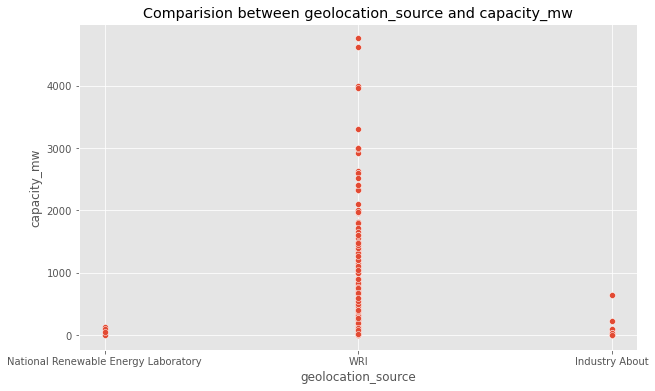

In [39]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

Here,we can see that WRI plays a major role.

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

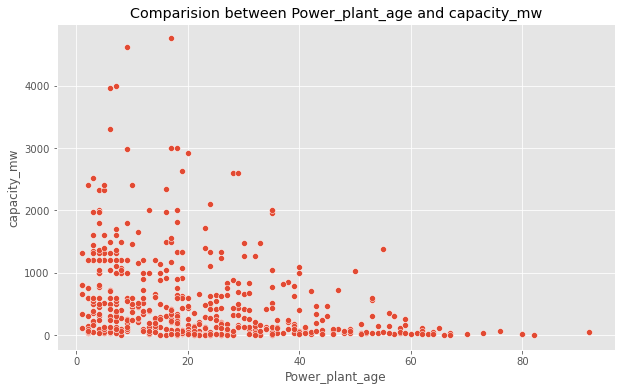

In [40]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

# Here we can see a negative corelation.

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

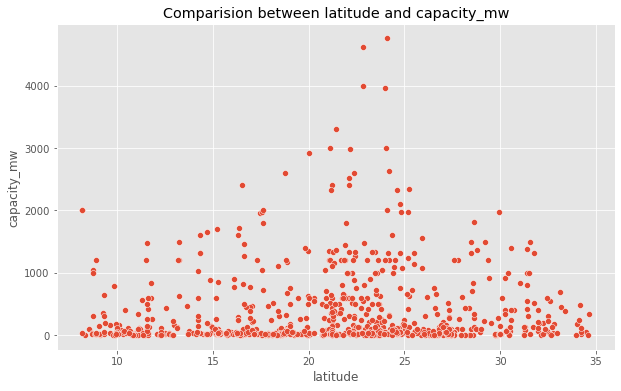

In [41]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

Here this feature do not show any linear relationship.

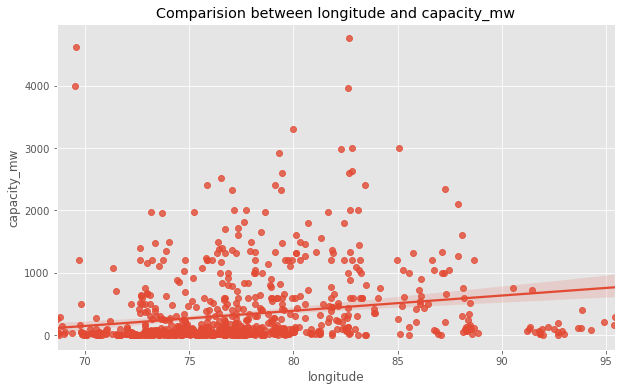

In [42]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

This feature also do not show any linear relationship.

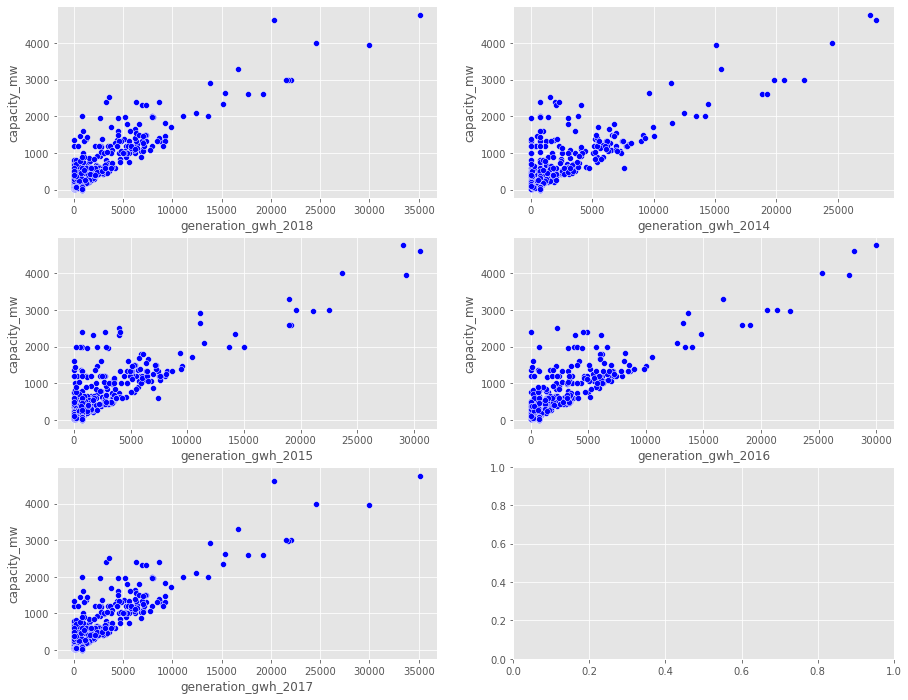

In [43]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[2,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw",ax=axes[0,0],data = df,color="b")

plt.show()

This features shows a positive corelation between the 'generation_gwh' & 'capacity_mw'. 
Here the electricity generation reported for the years has capacity above 1000 mw.
here,the capacity of plant is also increases with increase in the generation growth moderately.

# Corealtion between features and target 'primary_fuel'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and primary_fuel'}, xlabel='Power_plant_age', ylabel='primary_fuel'>

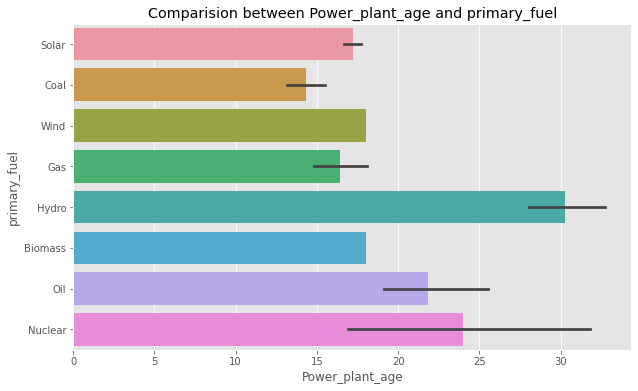

In [44]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and primary_fuel')
sns.barplot(df['Power_plant_age'],df["primary_fuel"])

Here we can see that the power plants older than 20 years is using Hydro as energy source, followed by Nuclear & oil. The power plants below 20 years of age are using of Wind, Biomass,Solar & Coal as primary fuel.

<AxesSubplot:title={'center':'Comparision between latitude and primary_fuel'}, xlabel='latitude', ylabel='primary_fuel'>

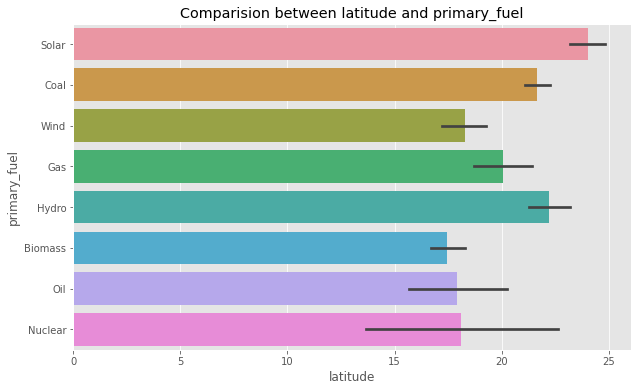

In [45]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['latitude'],df["primary_fuel"])

Solar has the highest latitude.

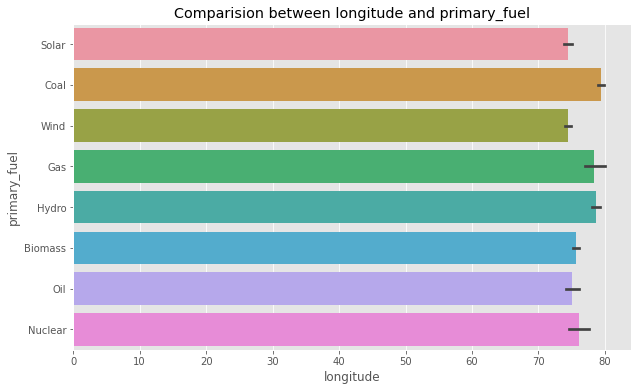

In [46]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and primary_fuel')
sns.barplot(df['longitude'],df["primary_fuel"]);

Here Coal shows the highest longitude.

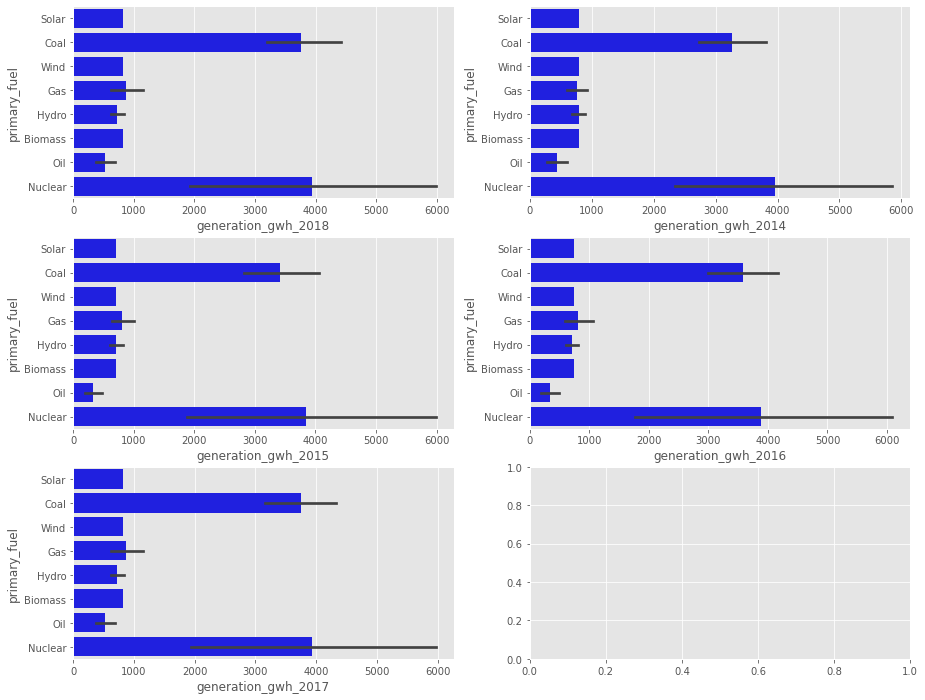

In [47]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2014',y='primary_fuel',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='primary_fuel',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='primary_fuel',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='primary_fuel',ax=axes[2,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2013 and targer Fuel_Type
sns.barplot(x= "generation_gwh_2018",y= "primary_fuel",ax=axes[0,0],data = df,color="b")


plt.show()

Here we can see that the most used energy source in all the years is neuclear followed by coal.

# Checking the relationship between both the targets

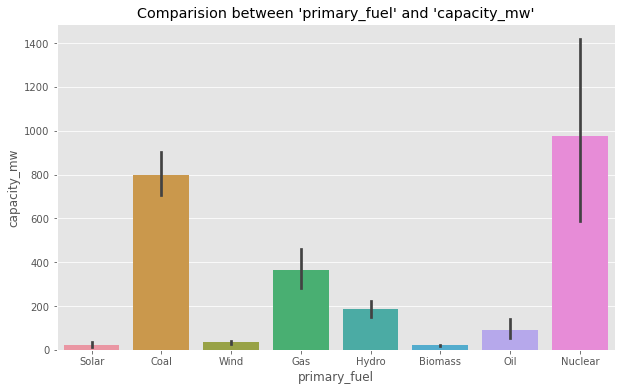

In [48]:
plt.figure(figsize = (10,6))
plt.title("Comparision between 'primary_fuel' and 'capacity_mw'")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

here we observe that "Nuclear" has major contribution in generation of energy.

In [49]:
import scipy as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


# Label Encoding

In [50]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [51]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [52]:
df[categorical_col]


,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


Now we have encoded all the categorical columns.

# Identifying the outliers

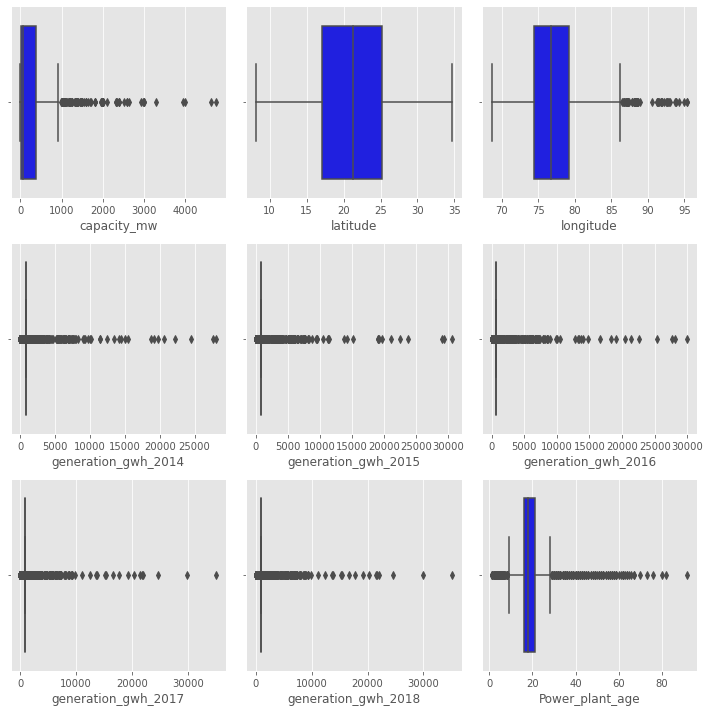

In [53]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers. Let's remove outliers using Zscore method.

In [54]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [55]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']]


In [56]:
z=np.abs(zscore(features))

z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871]])

In [57]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,817.977250,8.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,663.774500,15.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,865.400000,3.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,817.977250,18.0


# Correlation between the target variable and features using HEAT map

In [58]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050048,0.257383,-0.398217,-0.001441,-0.275072,0.233871,0.615801,0.674601,0.748505,0.792419,0.792419,-0.245110
latitude,0.050048,1.000000,-0.014135,-0.002573,0.037050,0.069413,-0.203314,0.081653,0.071346,0.057236,0.070829,0.070829,-0.096958
longitude,0.257383,-0.014135,1.000000,-0.383326,0.029222,-0.235970,0.263930,0.119811,0.154708,0.196012,0.197348,0.197348,-0.080772
primary_fuel,-0.398217,-0.002573,-0.383326,1.000000,0.006395,0.039112,-0.478753,-0.250588,-0.276529,-0.287871,-0.290991,-0.290991,0.075706
other_fuel1,-0.001441,0.037050,0.029222,0.006395,1.000000,0.028433,-0.022798,-0.000491,0.006114,0.015561,0.011987,0.011987,-0.058132
source,-0.275072,0.069413,-0.235970,0.039112,0.028433,1.000000,-0.498012,-0.141798,-0.156488,-0.159255,-0.157090,-0.157090,-0.074509
geolocation_source,0.233871,-0.203314,0.263930,-0.478753,-0.022798,-0.498012,1.000000,0.113695,0.125473,0.127691,0.125956,0.125956,0.050944
generation_gwh_2014,0.615801,0.081653,0.119811,-0.250588,-0.000491,-0.141798,0.113695,1.000000,0.912174,0.800971,0.743005,0.743005,-0.060584
generation_gwh_2015,0.674601,0.071346,0.154708,-0.276529,0.006114,-0.156488,0.125473,0.912174,1.000000,0.907191,0.825737,0.825737,-0.130635
generation_gwh_2016,0.748505,0.057236,0.196012,-0.287871,0.015561,-0.159255,0.127691,0.800971,0.907191,1.000000,0.931186,0.931186,-0.201005


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'primary_fuel'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

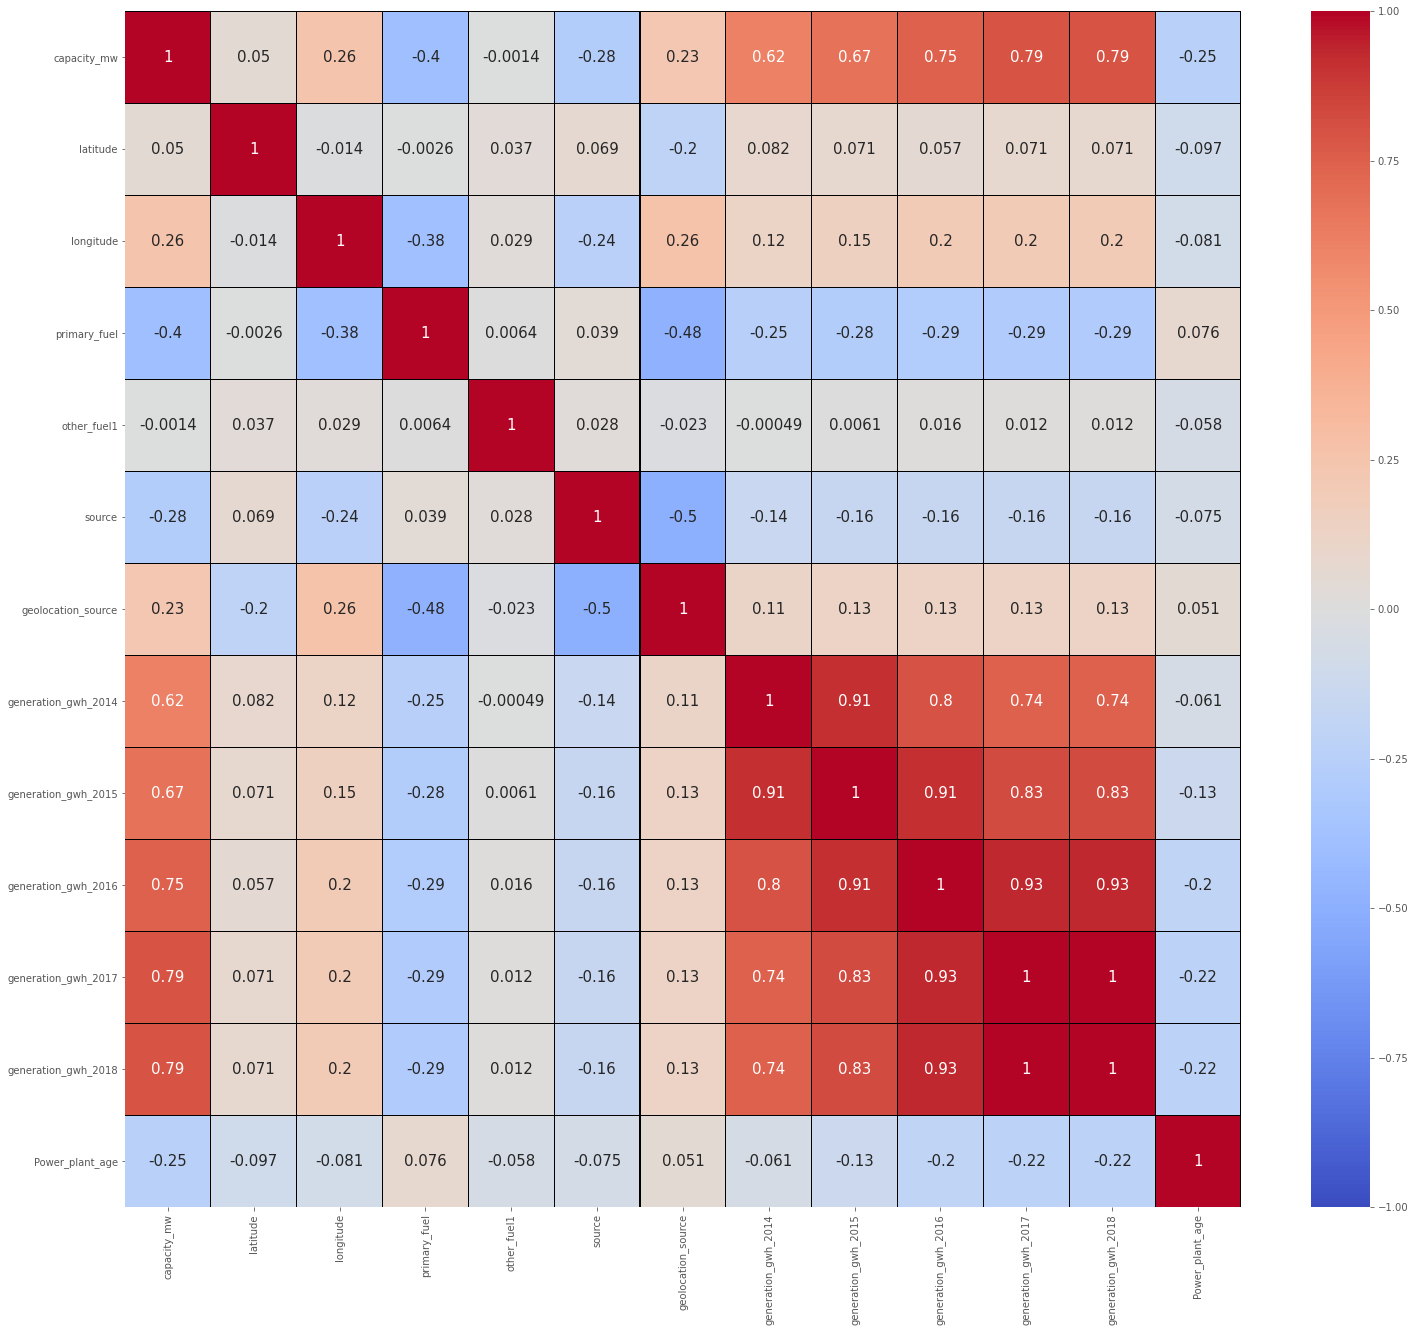

In [59]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="coolwarm")
plt.yticks(rotation=0)

Here we can see the co-relation between all the features and the features and targets

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

The label Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

# Visualizing the correlation between label and features using bar plot

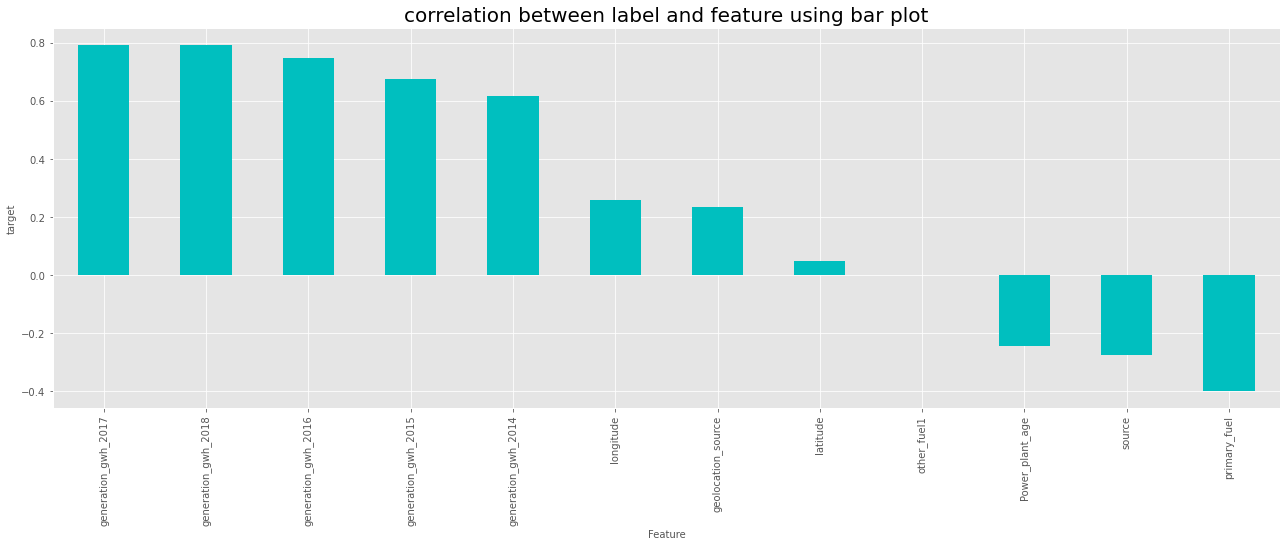

In [60]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Visualizing the correlation between label and features using bar plot

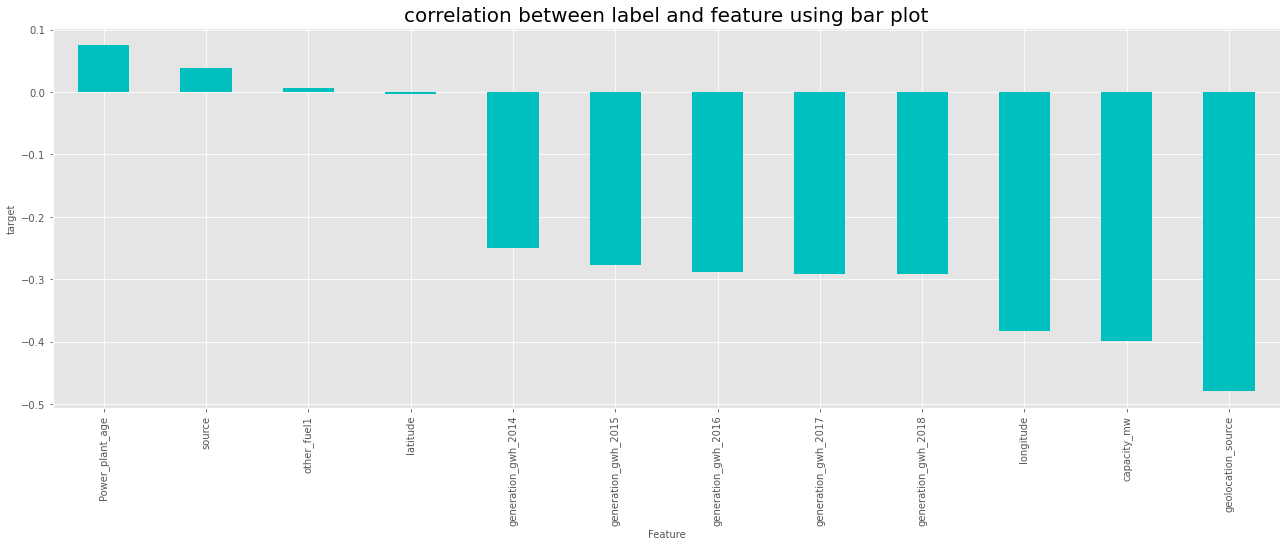

In [61]:
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Feature selection by dropping irrelevant features

In [62]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [63]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,817.977250,8.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,18.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,663.774500,15.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,4.0


# PREDICTION

# 1) Primary fuel

In [64]:
x_df = new_df.drop("primary_fuel", axis=1)
y_df = new_df["primary_fuel"]

In [65]:
x_df.shape

(852, 10)

In [66]:
y_df.shape

(852,)

In [67]:
x_df.skew().sort_values()

geolocation_source    -2.068499
longitude              0.944167
Power_plant_age        1.279935
source                 1.736117
capacity_mw            2.185823
generation_gwh_2017    2.531497
generation_gwh_2018    2.531497
generation_gwh_2016    2.634502
generation_gwh_2015    2.714849
generation_gwh_2014    2.941090
dtype: float64

We can see that there are skewness in most of the columns.

# Removing the skewness

In [68]:
skew = ['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [69]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.677574,-0.923108,-0.037222,-0.045344,-0.050236,-0.047960,-0.037222,-1.088964
1,0.218008,-0.500996,-0.037222,-0.045344,-0.050236,-0.047960,-0.037222,0.050189
2,-0.275959,-2.377958,-0.037222,-0.045344,-0.050236,-0.047960,-0.037222,0.050189
3,0.389127,2.432300,-0.201197,-0.270221,0.092725,0.103688,-0.201197,-0.244352
4,1.726747,1.261687,1.972624,1.425934,2.286967,2.272564,1.972624,-1.764652


In [70]:
x_df.skew().sort_values()


geolocation_source    -2.068499
longitude             -0.000209
capacity_mw            0.016478
Power_plant_age        0.036264
generation_gwh_2017    0.126375
generation_gwh_2018    0.126375
generation_gwh_2016    0.145702
generation_gwh_2015    0.163407
generation_gwh_2014    0.231858
source                 1.736117
dtype: float64

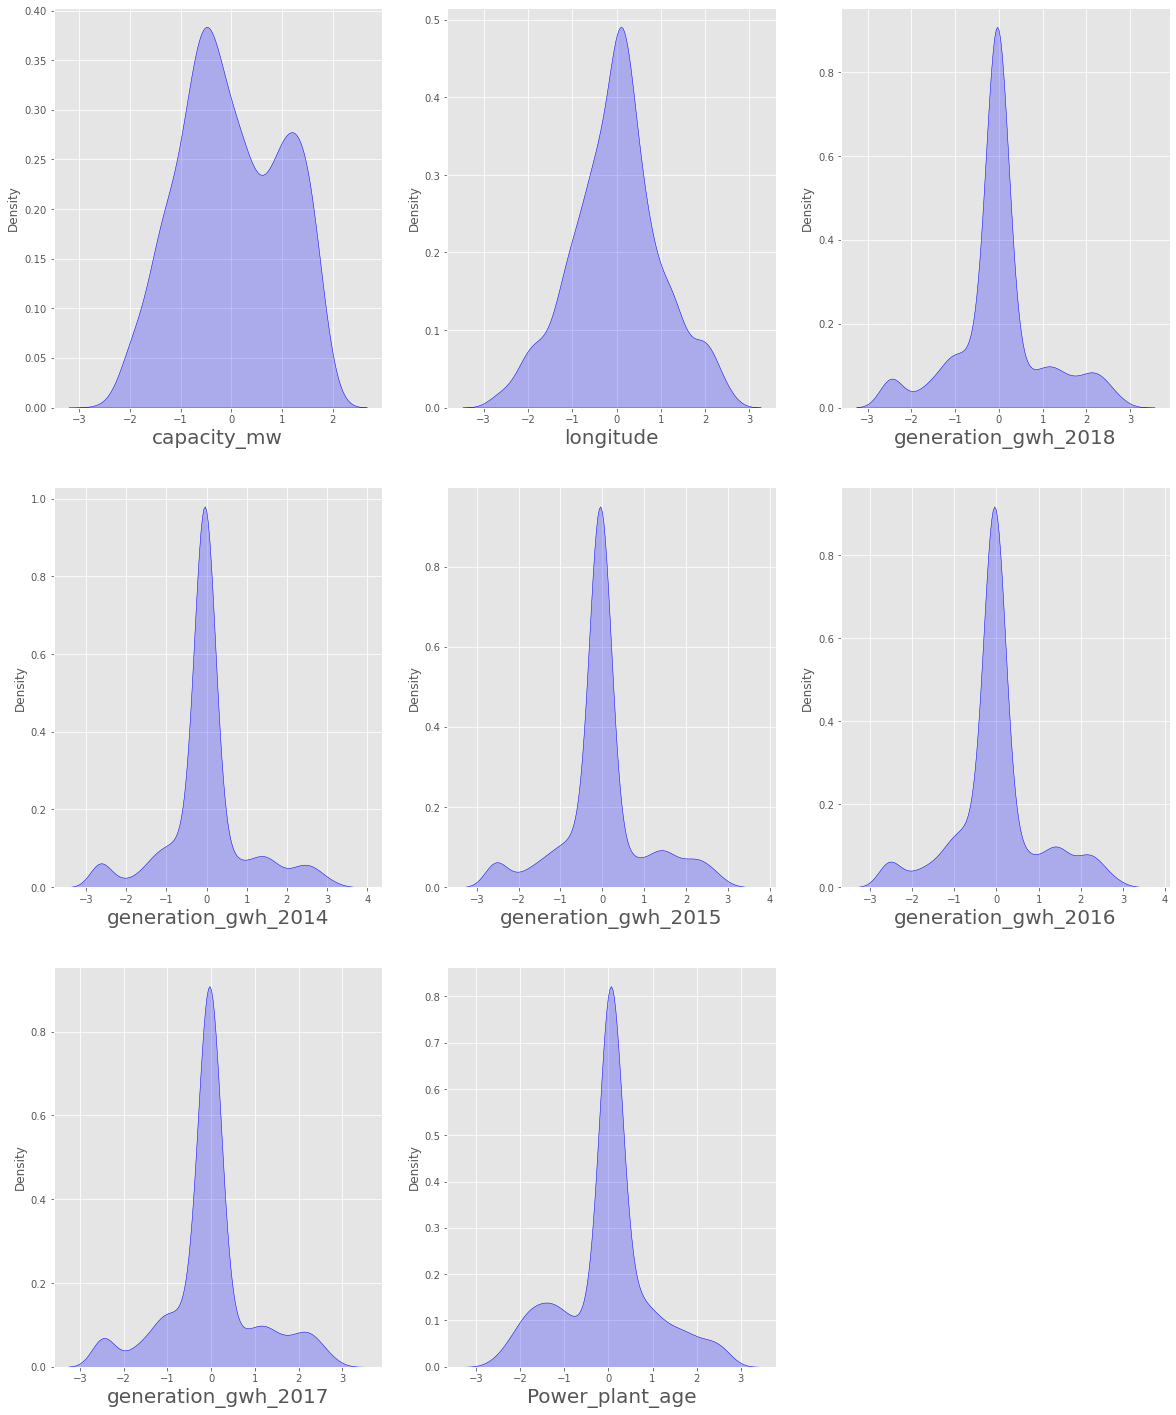

In [71]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Feature Scalling

In [72]:
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677574,-0.923108,1.399156,-1.037509,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.088964
1,0.218008,-0.500996,2.823623,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
2,-0.275959,-2.377958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
3,0.389127,2.432300,-0.507437,0.406866,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.244352
4,1.726747,1.261687,-0.507437,0.406866,1.425934,2.286967,2.272564,1.972624,1.972624,-1.764652
...,...,...,...,...,...,...,...,...,...,...
847,1.667859,0.230878,-0.507437,0.406866,-0.045344,-2.461735,-0.843361,0.008697,0.008697,-1.980475
848,-1.598427,0.420621,0.697881,-2.481884,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
849,-0.508566,-0.225562,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
850,0.109088,-0.761758,0.303413,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189


# Checking Multicolinearity

In [73]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.815097,capacity_mw
1,1.191680,longitude
2,1.413329,source
3,1.590783,geolocation_source
4,3.614134,generation_gwh_2014
5,6.188749,generation_gwh_2015
6,9.584127,generation_gwh_2016
7,inf,generation_gwh_2017
8,inf,generation_gwh_2018
9,1.156832,Power_plant_age


We have seen that all the columns has vif values less then 10, hence there is no multicolinearity that exist.

In [74]:
y_df.value_counts()

1    239
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

We can see that the target 'primary_fuel' has multiple classes in the mode of energy source, hence we can see that this is a multi-classification problem. As the data between the classes are not balance with 1 having 239 counts and 4 having only 9 counts. We have to do oversampling of the data.

# OverSampling

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [76]:
y_df.value_counts()

0    239
1    239
2    239
3    239
4    239
5    239
6    239
7    239
Name: primary_fuel, dtype: int64

Here we can see that the data imbalance has been removed.

In [77]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677574,-0.923108,1.399156,-1.037509,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.088964
1,0.218008,-0.500996,2.823623,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
2,-0.275959,-2.377958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
3,0.389127,2.432300,-0.507437,0.406866,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.244352
4,1.726747,1.261687,-0.507437,0.406866,1.425934,2.286967,2.272564,1.972624,1.972624,-1.764652


# Modelling

In [78]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_df_train,x_df_test, y_df_train, y_df_test=train_test_split(x_df,y_df,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_df_train,y_df_train)
    pred=rfc.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9337979094076655  on Random_state  149


# Creating train_test_split

In [79]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

# Logistic Regression

In [80]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_df_train,y_df_train)

#Prediction
predlog = log.predict(x_df_test)

print(accuracy_score(y_df_test, predlog))
print(confusion_matrix(y_df_test, predlog))
print(classification_report(y_df_test,predlog))

0.6724738675958188
[[61  0  0  1  0  2  0  8]
 [ 8 24  8  4 11  0  0  2]
 [ 1 20 26 14  9 12  0  1]
 [ 0  9  4 31  6  6  0 13]
 [ 0  6  0  3 58  2  0  0]
 [ 7  7  1  2  0 55  0  4]
 [ 0  2  0  0  0  0 70  0]
 [ 0  0  0 15  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        72
           1       0.35      0.42      0.38        57
           2       0.67      0.31      0.43        83
           3       0.44      0.45      0.45        69
           4       0.69      0.84      0.76        69
           5       0.71      0.72      0.72        76
           6       1.00      0.97      0.99        72
           7       0.69      0.80      0.74        76

    accuracy                           0.67       574
   macro avg       0.67      0.67      0.66       574
weighted avg       0.68      0.67      0.66       574



###### The accuracy score for Logistic Regression is 67%

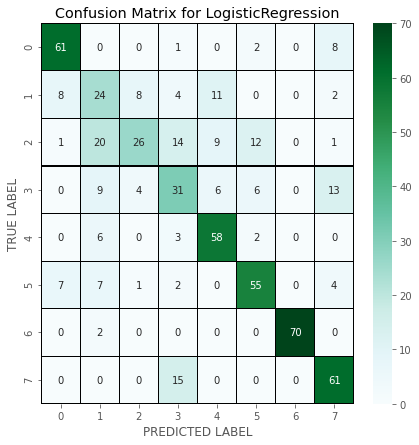

In [81]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_df_test,predlog)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Random Forest Classifier

In [82]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_df_train,y_df_train)

# Prediction
predrf = rf.predict(x_df_test)

print(accuracy_score(y_df_test, predrf))
print(confusion_matrix(y_df_test, predrf))
print(classification_report(y_df_test,predrf))

0.926829268292683
[[71  0  0  0  0  0  0  1]
 [ 0 49  5  2  1  0  0  0]
 [ 0  4 71  7  0  1  0  0]
 [ 0  4  5 57  1  2  0  0]
 [ 0  0  0  1 68  0  0  0]
 [ 0  5  2  1  0 68  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.79      0.86      0.82        57
           2       0.86      0.86      0.86        83
           3       0.84      0.83      0.83        69
           4       0.97      0.99      0.98        69
           5       0.96      0.89      0.93        76
           6       1.00      1.00      1.00        72
           7       0.99      1.00      0.99        76

    accuracy                           0.93       574
   macro avg       0.93      0.93      0.93       574
weighted avg       0.93      0.93      0.93       574



The accuracy score for RandomForestClassifier is 92.7%

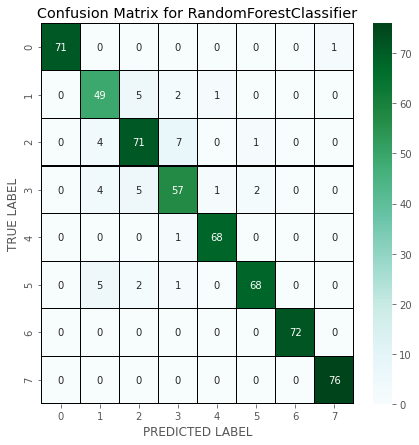

In [83]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predrf)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Decission Tree Classifier

In [84]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_df_train,y_df_train)

#Prediction
preddtc = dtc.predict(x_df_test)

print(accuracy_score(y_df_test, preddtc))
print(confusion_matrix(y_df_test, preddtc))
print(classification_report(y_df_test,preddtc))

0.8797909407665505
[[65  5  0  0  0  1  0  1]
 [ 0 41  5  6  4  1  0  0]
 [ 0  5 68  6  2  2  0  0]
 [ 0  9  6 52  1  1  0  0]
 [ 0  2  0  1 65  1  0  0]
 [ 0  4  5  1  0 66  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        72
           1       0.62      0.72      0.67        57
           2       0.81      0.82      0.81        83
           3       0.79      0.75      0.77        69
           4       0.90      0.94      0.92        69
           5       0.92      0.87      0.89        76
           6       1.00      1.00      1.00        72
           7       0.99      1.00      0.99        76

    accuracy                           0.88       574
   macro avg       0.88      0.88      0.88       574
weighted avg       0.88      0.88      0.88       574



The accuracy score for decission tree Classifier is 88%

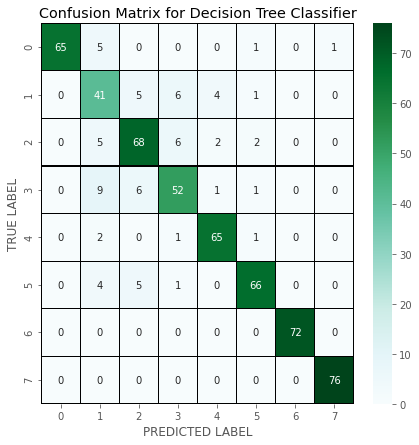

In [85]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Support Vector Machine Classifier

In [86]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# Prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.8118466898954704
[[60  0  0  0  0  1  0 11]
 [10 31  8  0  3  1  0  4]
 [ 0  8 59  0  2 13  0  1]
 [ 0  6 11 43  3  1  0  5]
 [ 0  0  0  2 67  0  0  0]
 [ 5  4  0  0  0 63  0  4]
 [ 0  2  0  0  0  0 70  0]
 [ 0  0  3  0  0  0  0 73]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        72
           1       0.61      0.54      0.57        57
           2       0.73      0.71      0.72        83
           3       0.96      0.62      0.75        69
           4       0.89      0.97      0.93        69
           5       0.80      0.83      0.81        76
           6       1.00      0.97      0.99        72
           7       0.74      0.96      0.84        76

    accuracy                           0.81       574
   macro avg       0.82      0.81      0.80       574
weighted avg       0.82      0.81      0.81       574



The accuracy scoe for svc is 81%

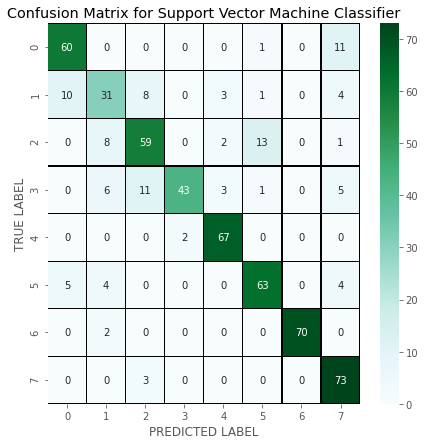

In [87]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier

In [88]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# Prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.9146341463414634
[[71  0  0  0  0  0  0  1]
 [ 1 51  3  1  1  0  0  0]
 [ 0  5 66  9  1  2  0  0]
 [ 0  7  8 53  0  1  0  0]
 [ 0  0  0  1 68  0  0  0]
 [ 0  3  3  1  0 69  0  0]
 [ 0  1  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.76      0.89      0.82        57
           2       0.82      0.80      0.81        83
           3       0.82      0.77      0.79        69
           4       0.97      0.99      0.98        69
           5       0.96      0.91      0.93        76
           6       1.00      0.99      0.99        72
           7       0.99      1.00      0.99        76

    accuracy                           0.91       574
   macro avg       0.91      0.92      0.91       574
weighted avg       0.92      0.91      0.91       574



The accuracy score Gradient Boosting Classifier is 91%

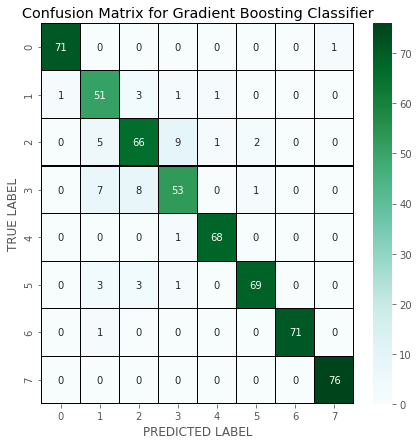

In [89]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Cross_Validation_Score

In [90]:
#cv score for Logistic Regression
print(cross_val_score(log,x_df,y_df,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x_df,y_df,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rf,x_df,y_df,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.6950719724413216
0.8645510095279756
0.9126679698713656
0.7954916408076225
0.8985482481921452


From the accuracy score and cross validation we can see that Random Forest Classifier is the best model.

# HyperParameter Tuning for the model with best score

In [91]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [92]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [93]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [94]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

These are the best parameters

In [95]:
fuel_type =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

88.50174216027874


After HyperParameter tuning we have received an accuracy score of 88.5%

# Plotting ROC and compare AUC for the final model

In [96]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

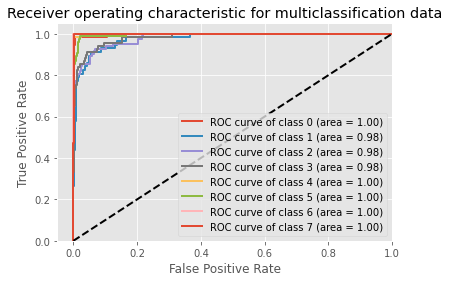

In [97]:
classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [98]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_PrimaryFuel.pkl")

['Global_Power_Plant_PrimaryFuel.pkl']

# ------------------------------------------------------------------------------------------------------------

# PREDICTION

# 2) Capacity_mw

In [99]:
#Seperating the features and target variable
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [100]:
x.shape

(852, 10)

In [101]:
x.skew().sort_values()

geolocation_source    -2.068499
primary_fuel           0.415658
longitude              0.944167
Power_plant_age        1.279935
source                 1.736117
generation_gwh_2017    2.531497
generation_gwh_2018    2.531497
generation_gwh_2016    2.634502
generation_gwh_2015    2.714849
generation_gwh_2014    2.941090
dtype: float64

All the columns have skewness more than +0.5 and -0.5 except 'primary_fuel'.

In [102]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [103]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.923108,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.088964
1,-0.500996,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
2,-2.377958,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
3,2.432300,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.244352
4,1.261687,1.425934,2.286967,2.272564,1.972624,1.972624,-1.764652


In [104]:
x.skew()

longitude             -0.000209
primary_fuel           0.415658
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2014    0.231858
generation_gwh_2015    0.163407
generation_gwh_2016    0.145702
generation_gwh_2017    0.126375
generation_gwh_2018    0.126375
Power_plant_age        0.036264
dtype: float64

The skewness hasbeen removed now.

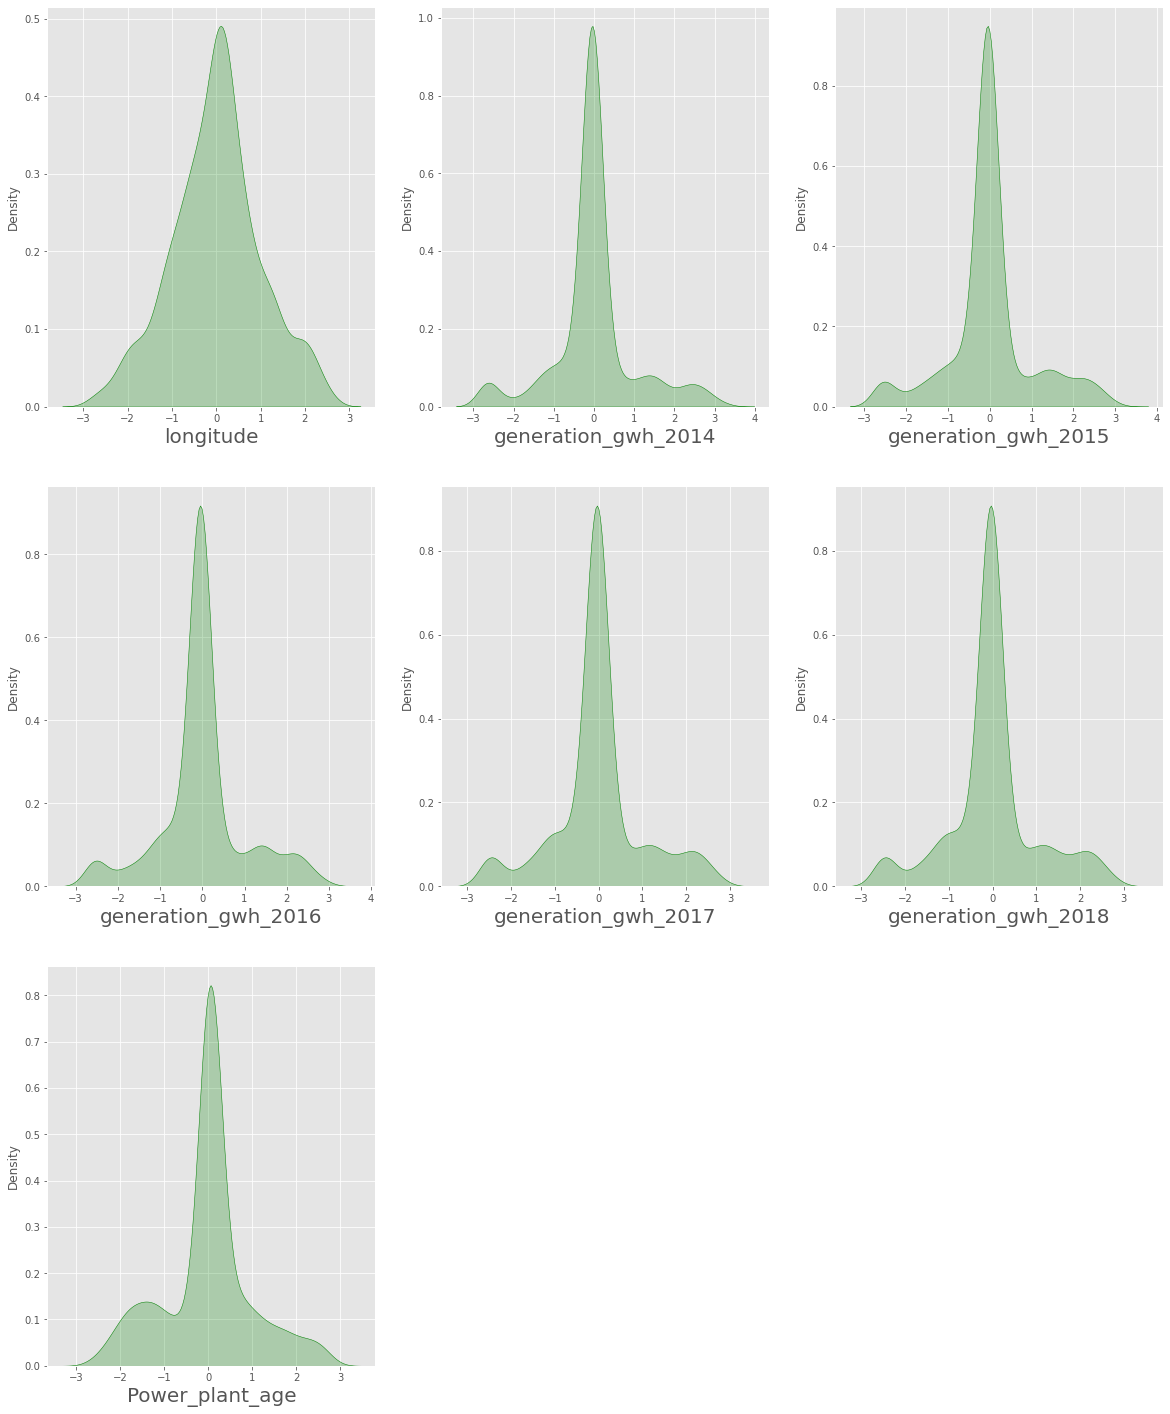

In [105]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

After removing skewness now the dataset looks normal.

# Feature Scalling

In [106]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.923108,1.176685,1.399156,-1.037509,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.088964
1,-0.500996,-0.974679,2.823623,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
2,-2.377958,1.606958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
3,2.432300,-0.544406,-0.507437,0.406866,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.244352
4,1.261687,-0.974679,-0.507437,0.406866,1.425934,2.286967,2.272564,1.972624,1.972624,-1.764652
...,...,...,...,...,...,...,...,...,...,...
847,0.230878,-0.974679,-0.507437,0.406866,-0.045344,-2.461735,-0.843361,0.008697,0.008697,-1.980475
848,0.420621,1.176685,0.697881,-2.481884,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
849,-0.225562,1.606958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189
850,-0.761758,-0.974679,0.303413,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.050189


The dataset x has now been scalled.

In [107]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.308092,longitude
1,1.683321,primary_fuel
2,1.503074,source
3,1.875744,geolocation_source
4,3.594227,generation_gwh_2014
5,6.180804,generation_gwh_2015
6,9.583196,generation_gwh_2016
7,inf,generation_gwh_2017
8,inf,generation_gwh_2018
9,1.103899,Power_plant_age


# MODELLING FOR CAPACITY_MW

In [108]:
#gettig the best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8456281467679962 Random_State 11


We got r2 score of 84.5%

In [109]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

# Linear Regression

In [110]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.6293065654555203
MAE: 193.20655388424422
MSE: 76228.51321372739
RMSE: 276.09511624389046


Getting an accuracy score of 63% with the base line Linear Regression Model.

# Random Forest Regressor

In [111]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.8415664174580422
MAE: 95.86065857086777
MSE: 32579.903809568692
RMSE: 180.4990410211885


Getting an accuracy score of 84% with Random Forest Regressor.

# Gradient Boosting Regressor

In [112]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8360291352991749
MAE: 100.0390492754763
MSE: 33718.577297902906
RMSE: 183.62618903060343


Getting an accuracy score of 83.6% with this model.

# Bagging Regressor

In [113]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.8133531069612062
MAE: 100.08454414682541
MSE: 38381.621648606924
RMSE: 195.91228049463086


Getting the r2 score for thsi model as 81%

# Cross- Validation

In [114]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x,y,cv=5).mean())

0.5407221767762824
0.7494617916123063
0.7339026228728003
0.7252185363727689


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

# Hyper Parameter Tuning for the model with best acc and cv score

In [115]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [116]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

These are the best parameters for the RandomForestRegressor.

In [118]:
capacity_mw = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity_mw.fit(x_train, y_train)
pred = capacity_mw.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 84.56314143599383
RMSE value: 180.4990410211885


After HyperParameter Tuning, we are getting an accuracy score of 84.5%

In [119]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# Conclusion:

# The accuracy score for "Primary Fuel" is 88.5%


# The accuracy score for "capacity_mw" is 84.56%